# 이미지 기본연산  
이미지는 numpy배열 이므로 정수와 +,-,/,* 를 통해 연산이 가능하다  

### 이미지 그레이 스케일로 읽기

In [6]:
# 이미지 그레이 스케일로 읽기
import cv2
GRAY = 0
COLOR = 1
img = cv2.imread('a.jpg', COLOR) #  1을 넣으면 컬러 0은 그레이 또는 cvt.Color로 변경가능 주로 상수로 많이 사용한다 이유는 


img2 = img+100 # 이미지 밝게 처리
img3 = img-100 # 이미지 어둡게 처리
cv2.imshow('img', img)
cv2.imshow('img2',img2) 
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

### [이미지 밝기 조절]
픽셀값이 클수록 밝고, 0에 가까울수록 어둡다

In [ ]:
img2 = img+100 # 이미지 밝게 처리
img3 = img-100 # 이미지 어둡게 처리
cv2.imshow('img2',img2) 
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과를 보면 이상하게 컬러가 나오는데 그 이유는 포화 연산 때문이다.
# 0-255, 200+100 = 300 이므로 44값이 나오는데 
# 그래서 255값을 max로 출력하기 위해서는 uint8로 넣어주어야 한다.
# 그래서 np.clip()함수를 사용해서 범위를 정해주어야한다.

### 포화연산
색상 값은 0-255사이의 값을 갖지만 +, - 연산을 수행하면 이 범위를 벗어나는 값을 만들기도 한다. 그런데 이미지 값의 타입은 uint8이므로 256을 0이 되므로 흰색이 검정색으로 변경된다. 이렇게 처리되면 아주 밝은 부분이 아주 어둡게, 또는 아주 어두운 부분이 아주 밝게 반대로 표현되어 이미지가 변질된다. 이를 위해서 포화연산을 처리해주어야 함

포화연산 : 픽셀값이 255를 넘으면 255로, 0 미만이면 0으로 처리하는 연산

함수: np.clip(src, 최소값, 최대값)
=> 배열 src 요소중 최소값보다 작은 것은 모두 최소값으로, 최대값보다 큰 값은 모두 최대값으로 대체해줌

In [ ]:
import numpy as np

def saturate_bright(p, num):
    pic = p.copy() # 깊은 복사로 타입을 변환
    pic = pic.astype('int32')
    pic = np.clip(pic+num, 0, 255) # 받아온 숫자로 밝기를 높혀줌
    pic = pic.astype('uint8') # 타입을 다시 변경시켜줌. 그러면 사진 안 깨짐.
    return pic
#img2 = np.clip(img+100,0,255).astype('uint8') # 이미지 밝게 처리
#img3 = np.clip(img,0,255).astype('uint8') # 이미지 밝게 처리
img2 = saturate_bright(img, 100)
cv2.imshow('img2',img2) 
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np

def saturate_bright(p, num):
    pic = p.copy() # 깊은 복사로 타입을 변환
    pic = pic.astype('int32')
    pic = np.clip(pic+num, 0, 255) # 받아온 숫자로 밝기를 높혀줌
    pic = pic.astype('uint8') # 타입을 다시 변경시켜줌. 그러면 사진 안 깨짐.
    return pic

def saturate_dark(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic-num, 0, 255) # 받아온 숫자를 밝기를 빼서 낮혀줌 
    pic = pic.astype('uint8') # 타입을 다시 변경시켜줌. 그러면 사진 안 깨짐.
    return pic

img2 = saturate_bright(img, 100)  #이미지 밝게 처리
img3 = saturate_dark(img, 100)  #이미지 어둡게 처리
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

과제 - 이미지 밝기를 트랙바로 조절하는 앱 만들기.  
<이미지 명암비 조절>  
명암비란 이미지의 밝은 부분과 어두운 부분의 밝기 차를 의미.  
명암비 조절은 이미지의 밝은 부분은 더 밝게, 이미지의 어두운 부분은 더 어둡게 함으로써 이미지 윤곽을 뚜렷하게 처리하므로 활용도 높음

In [ ]:
# def saturate_bright(p, num):
#     pic = p.copy() # 깊은 복사로 타입을 변환
#     pic = pic.astype('int32')
#     pic = np.clip(pic+num, 0, 255) # 받아온 숫자로 밝기를 높혀줌
#     pic = pic.astype('uint8') # 타입을 다시 변경시켜줌. 그러면 사진 안 깨짐.
#     return pic

# def saturate_dark(p, num):
#     pic = p.copy()
#     pic = pic.astype('int32')
#     pic = np.clip(pic-num, 0, 255) # 받아온 숫자를 밝기를 빼서 낮혀줌 
#     pic = pic.astype('uint8') # 타입을 다시 변경시켜줌. 그러면 사진 안 깨짐.
#     return pic

# def bright(pos):
#     pic = saturate_bright(img,pos)
#     cv2.imshow('img',pic)
    
# def dark(pos):
#     pic = saturate_dark(img,pos)
#     cv2.imshow('img',pic)

# color=1
# img = cv2.imread('d.jpg' ,color)



# img = cv2.imread('d.jpg', 1)
# cv2.imshow('img', img)
# # cv2.createTrackbar('타이틀 명','이미지 이름',최소값 ,최대값,함수실행)
# cv2.createTrackbar('bright', 'img', 0, 100, br)
# cv2.createTrackbar('dark', 'img', 0, 100, da)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

def br(pos):
    pic = saturate_bright(img, pos)
    cv2.imshow('img', pic)

def da(pos):
    pic = saturate_dark(img, pos)
    cv2.imshow('img', pic)
    
img = cv2.imread('d.jpg', 1)
cv2.imshow('img', img)
cv2.createTrackbar('bright', 'img', 0, 100, br)
cv2.createTrackbar('dark', 'img', 0, 100, da)
cv2.waitKey(0)
cv2.destroyAllWindows()







### 이미지 명암비 조절
명암비란 이미지의 밝은 부분과 어두운 부분의 밝기 차를 의미.  
명암비 조절은 이미지의 밝은 부분은 더 밝게, 이미지의 어두운 부분은 더 어둡게 함으로써   이미지 윤곽을 뚜렷하게 처리하므로 활용도 높음

In [ ]:
import numpy as np
import cv2
rgb_color = 1
img = cv2.imread('a.jpg', rgb_color)
def saturate_contrast1(p, num):
    pic = p.copy()
    pic = pic.astype('int64')
    pic = np.clip(pic*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [ ]:
#명암비를 1보다 작게 주면 밝기 차가 줄어들고 전반적으로 어두어짐
img4 = saturate_contrast1(img,0.5)

#명암비를 1보다 크게 주면 밝기 차가 커지고 흰색 영역이 넓어짐
img5 = saturate_contrast1(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

*명암비 효율적 조절 - 픽셀 중간값인 128을 기준으로 이 보다 큰 값은 더 밝게 만들고 128보다 작은 값은 더 어둡게 만듦으로써 대비를 크게 함

dst(x, y) = src(x, y) + (src(x, y)-128)*alpha

In [ ]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [ ]:
rgb_color = 1
img = cv2.imread('a.jpg', rgb_color)
img4 = saturate_contrast2(img,-0.5)
img5 = saturate_contrast2(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<히스토그램 분석>  
영상 픽셀 밝기 분포를 분석하여 밝기, 명암비 조절  

cv2.calcHist(img,channel,mask,histSize,range)  
img: 이미지 배열  
channel: 분석할 칼라  
mask: 분석할 영역. None이면 이미지 전체  (이미지 일 부분만 도출할때 사용)  
histSize: 히스토그램 크기. x축 값 개수  (bin의 갯수)  
range: x축 값 범위  (값의 범위)    

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('a.jpg', 0) 
hist = cv2.calcHist([img],[0],None,[256],[0,256]) # 분석해서 히스트로
plt.subplot(2,1,1),plt.imshow(img,'gray') # subplot plot을 나눠준다.
plt.subplot(2,1,2),plt.plot(hist,color='r')
plt.xlim([0,256]) # x의 리밋을 설정.
plt.show()

In [ ]:
img2 = saturate_bright(img, 30)
hist = cv2.calcHist([img2],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img2,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
import numpy as np

def saturate_bright(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+num, 0, 255)
    pic = pic.astype('uint8')
    return pic

def saturate_dark(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic-num, 0, 255)
    pic = pic.astype('uint8')
    return pic

img2 = saturate_bright(img, 100)  #이미지 밝게 처리
img3 = saturate_dark(img, 100)  #이미지 어둡게 처리
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('a.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
img2 = saturate_bright(img, 30)
hist = cv2.calcHist([img2],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img2,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
def saturate_contrast1(p, num):
    pic = p.copy()
    pic = pic.astype('int64')
    pic = np.clip(pic*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

#명암비를 1보다 작게 주면 밝기 차가 줄어들고 전반적으로 어두어짐
img4 = saturate_contrast1(img,0.5)

#명암비를 1보다 크게 주면 밝기 차가 커지고 흰색 영역이 넓어짐
img5 = saturate_contrast1(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

*명암비 효율적 조절 - 픽셀 중간값인 128을 기준으로 이 보다 큰 값은 더 밝게 만들고 128보다 작은 값은 더 어둡게 만듦으로써 대비를 크게 함

dst(x, y) = src(x, y) + (src(x, y)-128)*alpha

In [ ]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

img4 = saturate_contrast2(img,-0.5)
img5 = saturate_contrast2(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<히스토그램 분석>
영상 픽셀 밝기 분포를 분석하여 밝기, 명암비 조절

cv2.calcHist(img,channel,mask,histSize,range)
img: 이미지 배열
channel: 분석할 칼라
mask: 분석할 영역. None이면 이미지 전체
histSize: 히스토그램 크기. x축 값 개수
range: x축 값 범위

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('a.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
img2 = saturate_bright(img, 30)
hist = cv2.calcHist([img2],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img2,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
img3 = saturate_dark(img, 30)
hist = cv2.calcHist([img3],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img3,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
img4 = saturate_contrast2(img, 2)
hist = cv2.calcHist([img4],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img4,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
img5 = saturate_contrast2(img, -0.5)
hist = cv2.calcHist([img5],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img5,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
f_max = img5.max()
f_min = img5.min()
nframe = img5.astype('int64')
img6 = np.clip((nframe - f_min)*255/(f_max - f_min), 0, 255).astype('uint8')
hist = cv2.calcHist([img6],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img6,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
hist, bins = np.histogram(img5.flatten(), 256,[0,256])

cdf = hist.cumsum()  #누적합. 각 빈의 누적합 계산
cdf_m = np.ma.masked_equal(cdf,0) #속도개선을 위해 0인 부분 제외

#히스토그램 평활화
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img7 = cdf[img5]#img5의 값이 cdf배열의 인덱스로 사용됨
                #cdf는 히스토그램 평활화된 값이 저장되어 있으므로
                #img5[12][10]칸의 픽셀값이 125이면 cdf[125]의 값을 추출
                #이 값은 픽셀값 125가 평활화된 값이다
            
hist = cv2.calcHist([img7],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img7,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
img8 = cv2.equalizeHist(img5)
hist = cv2.calcHist([img8],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img8,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [ ]:
# 두 이미지의 픽셀 값을 더하여 구한다.
import cv2

img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

img3 = cv2.bitwise_and(img1, img2) # and로 이미지를 합쳐줌.
img4 = cv2.bitwise_or(img1, img2) # or로 이미지 합
img5 = cv2.bitwise_not(img2) # not으로 이미지합
img6 = cv2.bitwise_xor(img1, img2) # xor으로 이미지 합

imgh1 = cv2.hconcat([img1, img2, img3]) # hconcat은 가로로 붙임.
imgh2 = cv2.hconcat([img4, img5, img6]) 

res = cv2.vconcat([imgh1, imgh2]) # vconcat은 세로로 붙임

cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img1 = cv2.imread('a.jpg', 1)
# dsize는 이미지의 크기를 조정해준다.
# interpolation은 이미지를 어떻게 보관할 건지 사용하는 속성
img1 = cv2.resize(img1, dsize=(640, 410), interpolation=cv2.INTER_AREA)
img2 = cv2.imread('b.jpg', 1)
# 이미지를 결합한다.
img3 = img1 + img2 # 포화발생

cv2.imshow('img', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def saturate_add(p1, p2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(pic1+pic2, 0, 255)

    pic = pic.astype('uint8')
    return pic

In [ ]:
img3 = saturate_add(img1, img2)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img5 = cv2.add(img1, img2)
cv2.imshow('img3', img3)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def saturate_addWeight(p1, a1, p2, a2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(a1*pic1 + a2*pic2, 0, 255)
    
    pic = pic.astype('uint8')
    return pic

In [ ]:
img3 = saturate_addWeight(img1, 0.4, img2, 0.6)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img5 = cv2.addWeighted(img1, 0.4, img2, 0.6, 0)
cv2.imshow('img3', img3) # 우리가 만든 함수 
cv2.imshow('img5', img5) # opencv에서 제공해줌
cv2.waitKey(0)
cv2.destroyAllWindows()

# 과제
트랙바를 사용하여 두 이미지 합성 비율을 조절하는 프로그램을 만들기

In [ ]:
import cv2

def s(pos):
    # addWeighted
    pic = cv2.addWeighted(img1, (100-pos)/100, img2, pos/100 ,0)
    cv2.imshow('img', pic)

# 이미지 두개가 달라서 사이즈 같게 설정
img1 = cv2.imread('face1.jpg', 1)
img1 = cv2.resize(img1, (320, 270))
img2 = cv2.imread('face2.jpg', 1)
img2 = cv2.resize(img2, (320, 270))


  
cv2.imshow('img', img1)
cv2.createTrackbar('bright', 'img', 0, 100, s)
cv2.waitKey(0)
cv2.destroyAllWindows()

<마스크 연산>  
추출하고 싶은 객체를 제외한 나머지 배경을 0으로 처리하면 배경은 검정색, 객체는 그대로인 이미지가 된다. 이를 합성하려는 이미지와 더하면 배경은 0이므로 합성하는 이미지의 내용 그대로, 객체는 위로 붙게된다.

In [ ]:
import cv2
daum_logo = cv2.imread('daum.png', 1)
background = cv2.imread('b.jpg',1)
h,w,c=daum_logo.shape # 다음로고의 각 사이즈를 저장한다.
background[200:200+h, 200:200+w] = daum_logo
cv2.imshow('background',background)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 예시
import numpy as np
b1 = np.full((200,300,3),(0,255,255),dtype=np.uint8)
b2 = np.full((200,300,3),(0,0,0),dtype=np.uint8)
b3 = b1+b2
cv2.imshow('1',b1)
cv2.imshow('2',b2)
cv2.imshow('3',b3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
daum_logo = cv2.imread('daum.png', 1)
background = cv2.imread('b.jpg',1)
h,w,c=daum_logo.shape # 다음로고의 각 사이즈를 저장한다.
daum_logo[daum_logo[:]==255]=0 # 로고의 흰색 부분을 모두 검은색 즉, 0으로 치환한다.
roi = background[200:200+h,200:200+w] # 백그라운드에서 x:200~200+h y:200+200+w 부분을 변수에저장.
# 검은 부분만 배경이미지로 덮어주면됨
#result = daum_logo[daum_logo[:]==0] + roi
#print(daum_logo[:])
i = daum_logo[:]
if 0 in i:
    i[0,0,0]+background[200:200+h,200:200+w]
background[200:200+h, 200:200+w] = daum_logo
cv2.imshow('background',background)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

background = cv2.imread("b.jpg")
logo = cv2.imread("daum.png")

gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
_, mask_inv = cv2.threshold(gray_logo, 10, 255, cv2.THRESH_BINARY_INV)

cv2.imshow("mask_inv", mask_inv)
cv2.waitKey()

cv2.imshow("background", background)
cv2.imshow("logo", logo)
cv2.waitKey()

In [ ]:
# 마스킹 작업
import cv2
daum_logo = cv2.imread('daum.png',1)
img1 = cv2.imread('b.jpg',1)
h,w,c = daum_logo.shape
#배경이미지의 변경할(다음 로고 넣을) 영역
roi = img1[150:150+h,150:150+w]

# 다음 글자 추출
#로고를 흑백처리
#이미지 이진화 => 배경은 검정. 글자는 흰색
mask = cv2.cvtColor(daum_logo, cv2.COLOR_BGR2GRAY)
mask[mask[:]==255]=0
mask[mask[:]>0]=255


# 마스크 인버트는 bitwise_not함수로 글자만 추출해 낸다.
#mask반전.  => 배경은 흰색. 글자는 검정
mask_inv = cv2.bitwise_not(mask)

#  위에 마스크에서 추출한 부분을 로고에 더해줌으로 마스크만 빼냄
#마스크와 로고 칼라이미지 and하면 글자만 추출됨
daum=cv2.bitwise_and(daum_logo, daum_logo, mask=mask)
#  로이와 마스크를 합쳐냄. 측 배경에서 글자부분만 파냄.
#roi와 mask_inv와 and하면 roi에 글자모양만 검정색으로 됨
back = cv2.bitwise_and(roi, roi,mask=mask_inv)
# 더해서 결과 값을 만들어낸다.
#로고 글자와 글자모양이 뚤린 배경을 합침
dst = cv2.add(daum, back)
#  원본 이미지에 넣어준다.
#roi를 제자리에 넣음
img1[150:150+h,150:150+w] = dst
cv2.imshow('img1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 차>  
두 이미지 빼기 연산으로 차를 구할 수 있음  

dst(x, y) = src1(x, y) - src2(x, y)  

차 함수를 사용하는 이유는 이전 화면의 차이값을 

In [ ]:
import cv2
import numpy as np
def saturate_sub1(p1, p2):
    img1 = p1.copy()
    img2 = p2.copy()
    img1 = img1.astype('int32')
    img2 = img2.astype('int32')
    img3 = np.clip(img1 - img2, 0, 255)
    img3 = img3.astype('uint8')
    return img3



In [ ]:
arr1 = np.zeros((410, 320), dtype=np.uint8)
arr2 = np.full((410, 320), 255, dtype=np.uint8)
img1 = np.hstack((arr1, arr2))
img2 = cv2.imread('b.jpg', 0)
img3 = saturate_sub1(img1, img2)
img4 = saturate_sub1(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img3 = cv2.subtract(img1, img2)
img4 = cv2.subtract(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def saturate_sub(p1, p2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(np.abs(pic1 - pic2), 0, 255)
 
    pic = pic.astype('uint8')
    return pic

In [ ]:
img3 = saturate_sub(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img3 = cv2.absdiff(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

검은 화면에서 뺀 화면만 추출하기.  
즉, 검은 화면 + 움직임 값을 빼면된다.

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)#카메라 오픈
cap.set(3, 300) 
cap.set(4, 200)

prev_frame = None
# 영상 읽기
ret, prev_frame = cap.read()


while True:
    ret, frame = cap.read()   
    if ret: #정상 읽기일 때만
        
        f=cv2.absdiff(prev_frame, frame)
        cv2.imshow('img', f) #영상을 윈도우에 출력
        prev_frame=frame
        
        
        
    k = cv2.waitKey(1)
    if k==27: #입력한 키가 esc이면
        break
cap.release()
cv2.destroyAllWindows()

# 영상 필터링
필터링 연산  
마스크, 커널, 윈도우라 불리는 작은 행렬을 원본 이미지에 연산함  
커널은 일자형, 정사각형, 십자형 등이 있고 크기도 정할 수 있음 
커널의 정중앙 한 픽셀을 고정점(anchor)으로 하여 연산  

가운데 있는 픽셀을 m(0,0)을 앵커라고 한다.  
즉, 가운데 있느 값을 기준으로 주변에 계산된 결과값들이 그대로 원본 사진에 덮어써지게 된다.  

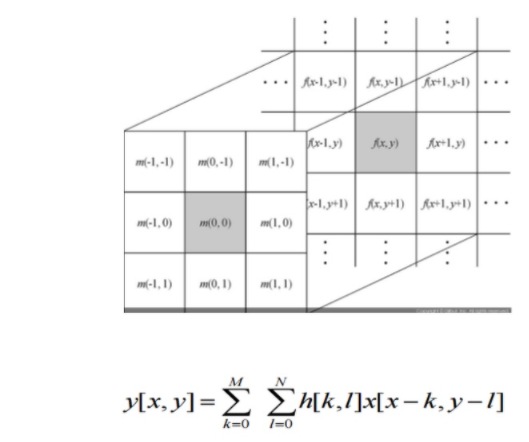

    테두리 연산을 위해 상수 제공(boarder type)  
    BOARDER_CONSTANT: 000abcdef000  (가운데는 엑셀 값으로 보면됨 양끝을 0으로 처리.)  
    BOARDER_REPLICATE: aaaabcdeffff  (양 옆을 맨 끝값)  
    BOARDER_REFLECT: cbaabcdeffed  (abcdef 에서 cba반대로계산 )  
    BOARDER_REFLECT_101: dcbabcdefedc  (bcd 에이를 제외한 연산)  

    필터링 함수  
    cv2.filter2D(원본이미지, 데이터타입, 커널,마스크, 앵커, 델타,테두리 픽셀 )  
    cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None,   delta=None, borderType=None) -> dst  
    src : 입력 영상  
    ddepth : 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F,   cv2.CV_64F, -1을 지정하면 src와 같은 타입의 dst 영상을 생성합니다.   kernel: 필터 마스크 행렬. 실수형.  
    anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용  
    delta: 추가적으로 더할 값  
    borderType: 가장자리 픽셀 확장 방식  
    dst: 출력 영상  

    opencv 이미지 데이터 타입 종류  
    CV_8U : 8-bit unsigned integer: uchar ( 0..255 )  
    CV_8S : 8-bit signed integer: schar ( -128..127 )  
    CV_16U : 16-bit unsigned integer: ushort ( 0..65535 )  
    CV_16S : 16-bit signed integer: short ( -32768..32767 )  
    CV_32S : 32-bit signed integer: int ( -2147483648..2147483647 )  
    CV_32F : 32-bit floating-point number: float ( -FLT_MAX..FLT_MAX, INF, NAN )  
    CV_64F : 64-bit floating-point number: double ( -DBL_MAX..DBL_MAX, INF, NAN )  

    엠보싱 필터링  
    이미지에 음영을 넣어 올록볼록하게 보이도록 하는 필터링  

    kernel =
    [[-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]]

In [ ]:
# 엠보싱 필터링
import cv2
import numpy as np
#  kernel =
#    [[-1, -1, 0],
#    [-1, 0, 1],
#    [0, 1, 1]]
kernel = np.array([-1,-1,0,-1,0, 1, 0, 1, 1]).reshape(3,3)
img = cv2.imread('b.jpg', 0) # 흑백으로 오픈
dst = cv2.filter2D(img, -1, kernel, None, (-1,-1), 128) # -1을주면 동일한 타입을 위해서
# None은 dst로 반환값을 말한다. 보통은 None이다.
# 앵커는 (-1,-1)로 설정.
# 델타값은 128을 더해준다. 안 해주면 효과가 덜 하다.
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

모션 블러 필터링  
카메라 좌우가 흔들린 효과를 만들어 줌  

    kernel =  
    1/size * [[0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]]  

In [ ]:
#모션 블러 필터링 커널 생성 예
import cv2
import numpy as np

size = 5
kernel = np.zeros((size, size))
# 사이즈는 보통 홀수로 하는게 좋다.
# 사이즈가 5면 2,
# kernel[int(2), :]=np.ones(size) 
kernel[int((size-1)/2), :]=np.ones(size) 
kernel/size

In [ ]:
import cv2
import numpy as np
size = 5
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :]=np.ones(size)
kernel = kernel/size

img = cv2.imread('a.jpg', 0)
dst = cv2.filter2D(img, -1, kernel)
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

    <블러링>
    영상을 부드럽게 만드는 필터링. 여러 종류 있음

        평균값 필터
        주변 픽셀값의 평균값으로 필터링
        
    kernel =
    1 / (33) [[1, 1, 1],
            [1, 1, 1],
            [1, 1, 1]]

In [ ]:
import cv2
import numpy as np

img = cv2.imread('b.jpg', 0)
k = 10   #커널 크기가 커질수록 뭉개짐이 심해짐
kernel = np.ones((k,k))/(k*k)
dst = cv2.filter2D(img, -1, kernel)
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

    블러링 opencv 함수
    평균값 필터 함수: cv2.blur(img, kernelSize)

In [ ]:
# 블러함수
import cv2
import numpy as np

img = cv2.imread('b.jpg', 0)
dst = cv2.blur(img, (3,3))
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

    블러링 opencv 함수
    가우시안 필터링: 가우시안 분포 함수를 근사하여 생성한 커널로 필터링.
    평균값 필터보다 자연스럽게 처리함

    cv2.GaussianBlur(img, ksize, sigmaX)
    ksize(w, h): 커널 크기
    sigmaX: x방향 가우시안 커널 표준 편차
    
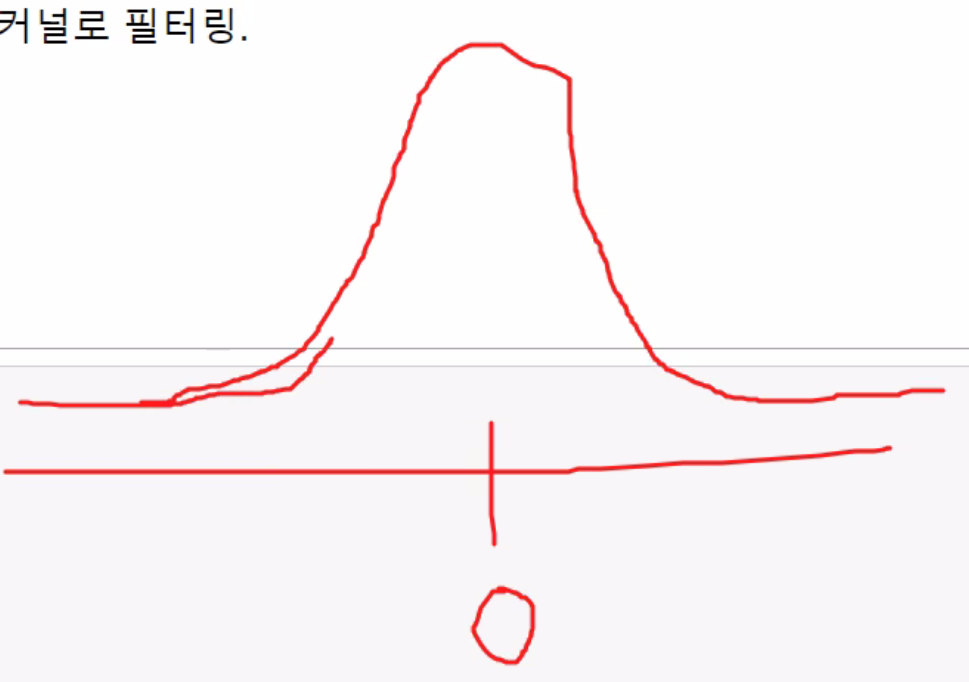

In [ ]:
# 가우시간 필터 블러링에서 주로 사용된다.
import cv2
import numpy as np

img = cv2.imread('b.jpg', 0)
cv2.imshow('img', img)

for i in range(1, 6):
    # (원본이미지, 사이즈, 가우시간 표준편차값)
    # 표준편차값이 커지면 효과가 세다.
    dst = cv2.GaussianBlur(img, (5,5), i)
    cv2.imshow('dst'+str(i), dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

    <샤프닝>
    영상의 윤곽을 뚜렷하고 선명하게 하는 필터링.
    언샤프닝: 샤프닝을 위해서는 블러링된 영상 사용
    
   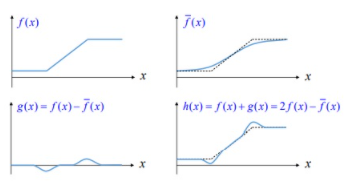
    
    첫 번째 그래프는 원본 이미지, 두 번째 그래프는 블러링한 이미지이다. 블러링으로 윤곽이 무뎌졌다. 이 부분의 차를 구한 것이 세번째 그래프이고 이 차를 확대해주면 경계선이 더욱 뚜렷해진다.

In [ ]:
# 흑백 이미지 언샤프닝
import cv2
import numpy as np

img = cv2.imread('c.jpg', 0)
cv2.imshow('img', img)

blr = cv2.GaussianBlur(img, (5,5), 5)
dst = np.clip(2.0*img - blr, 0, 255).astype('uint8')

cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 칼라 이미지 언샤프닝
import cv2
import numpy as np

img = cv2.imread('c.jpg')
cv2.imshow('img', img)

blr = cv2.GaussianBlur(img, (5,5), 5)
dst = np.clip(2.0*img - blr, 0, 255).astype('uint8')

cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

<잡음 제거 필터링>

잡음 생성
가우시안 난수 함수로 잡음 생성
cv2.randn(난수담을 배열, 가우시안 분포 평균, 가우시안 분포 표준 편차)

In [ ]:
# 잡음 제거 필터링
import cv2
import numpy as np

img = cv2.imread('c.jpg')

x = img.copy()  #노이즈 생성할 배열. 이미지와 동일 모양
x = x.astype('int8')  #부호있는 타입으로 변환
# 표준편차는 0.2정도가 적당하다.
cv2.randn(x, 0, 0.2)   #가우시안 난수 생성하여 배열 x에 담음
x = x.astype('uint8')  #이미지 타입으로 변환
y = cv2.add(img, x)    #원본 이미지와 노이즈 합성

cv2.imshow('img', y)

cv2.waitKey(0)
cv2.destroyAllWindows()

    잡음제거 opencv 함수
    앞에서 살펴본 가우시안블러 함수로 노이즈를 제거할 수 있지만 경계선도 흐릿해진다. 이를 보완해서 노이즈는 흐리게하고 경계선은 명확하게 하는 블러링 방법이 양방향 필터링이다

    cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, borderType)
    src – image
    d – filtering시 고려할 주변 pixel 지름
    sigmaColor – 색 공간 표준편차.
    sigmaSpace – 좌표 공간 표준편차.

In [ ]:
# 가우시안과 바이레터럴 필터 비교
import cv2
import numpy as np

img = cv2.imread('c.jpg')

x = img.copy()  #노이즈 생성할 배열. 이미지와 동일 모양
x = x.astype('int8')  #부호있는 타입으로 변환
# 표준편차는 0.2정도가 적당하다.
cv2.randn(x, 0, 0.2)   #가우시안 난수 생성하여 배열 x에 담음
x = x.astype('uint8')  #이미지 타입으로 변환
y = cv2.add(img, x)    #원본 이미지와 노이즈 합성

dst = cv2.bilateralFilter(y, 9, 100, 100)
#dst = cv2.GaussianBlur(y, (5,5), 2)
cv2.imshow('img', y)
cv2.imshow('img2', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

잡음이 소금과 후추처럼 도드라진 점을 제거하는 것은 미디언 필더가 더 효과적이다. 이 필터는 커널의 값들을 한줄로 정렬하여 중간값을 앵커로 지정하여 연산하는 필터링이다.

cv2.medianBlur(img, ksize)  
ksize: 커널크기

In [ ]:
# 미디언 필터
import cv2
import numpy as np
img = cv2.imread('c.jpg')

x = img.copy()  #노이즈 생성할 배열. 이미지와 동일 모양
x = x.astype('int8')  #부호있는 타입으로 변환
# 표준편차는 0.2정도가 적당하다.
cv2.randn(x, 0, 0.2)   #가우시안 난수 생성하여 배열 x에 담음
x = x.astype('uint8')  #이미지 타입으로 변환
y = cv2.add(img, x)    #원본 이미지와 노이즈 합성

# 3,3의 커널이면
dst = cv2.medianBlur(y, 3)
cv2.imshow('img', y)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

과제   = 블러 함수 구현하기.   
미디언 플러 111111111111로 커널을 만들어서   
원본이미지에 값과 매칭을해서 원본배열의 값이 나오면 그중에 중간값을 찾아서 바꾸도록 하면된다.



# 영상의 기하학적 변환
### <어파인 변환>  
영상의 평행이동, 확대 및 축소, 회전 등의 기하학적 변환

    리사이즈
    cv2.resize(img, dsize, fx, fy, interpolation)
    img – Image
    dsize – (가로, 세로)
    fx – 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5
    fy – 세로 사이즈의 배수
    interpolation – 보간법. 크기 조절시 픽셀 처리 방법 지정
    
    즉, 눞혀진 사진을 똑바로 고정 시켜준다.
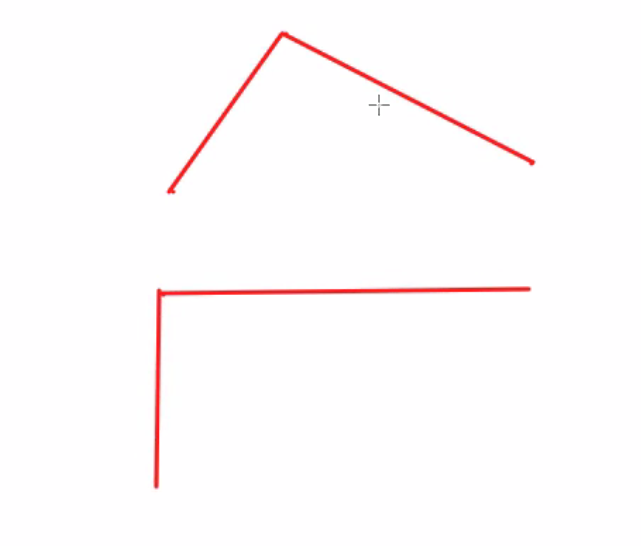

아래 링크 - 이미지의 기하하적 변형 참고하기.

https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html

In [ ]:
# 이미지 사이즈 조절
import cv2
import numpy as np

img = cv2.imread('c.jpg')
h, w, c = img.shape

# 보간법은 축소나 확대할때 어떻게 할건지에 대한 방법
# interpolation
# cv2.INTER_AREA
# cv2.INTER_CUBIC 을 지정

# cv2.INTER_AREA: 축소에 적합한 보간법
# 이미지 축소.
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# cv2.INTER_CUBIC: 3차 보간법. 고화질 
# 2배수 증가.
zoom1 = cv2.resize(img, (w*2, h*2), interpolation=cv2.INTER_CUBIC)

# 배수 Size지정
# 이미지 확대하면서 보간법 변경 
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)


cv2.imshow('Origianl', img)
cv2.imshow('Shrink', shrink)
cv2.imshow('Zoom1', zoom1)
cv2.imshow('Zoom2', zoom2)

cv2.waitKey(0)
cv2.destroyAllWindows()

    위치변환
    cv2.warpAffine(src, M, dsize)
    src – Image
    M – 변환 행렬
    dsize – (가로, 세로)

In [ ]:
# 위치 변환
import cv2
import numpy as np

img = cv2.imread('c.jpg')
h,w,c = img.shape

# 변환 행렬, X축으로 100, Y축으로 200 이동
M = np.float32([[1,0,100],[0,1,200]])
# 변환 행렬, X축으로 -100, Y축으로 -200 이동
M1 = np.float32([[1,0,-100],[0,1,-200]])

dst = cv2.warpAffine(img, M,(w, h))
dst1 = cv2.warpAffine(img, M1,(w, h))
cv2.imshow('Original', img)
cv2.imshow('Translation', dst) 
cv2.imshow('Translation1', dst1)

cv2.waitKey(0)
cv2.destroyAllWindows()

    이미지 회전
    cv2.getRotationMatrix2D(center, angle, scale)
    center – 이미지의 중심 좌표
    angle – 회전 각도
    scale – 이미지 변환 크기
    
    cv2.getRotationMatrix2D() 의 반환값은 행렬이다.

In [ ]:
import cv2

img = cv2.imread('c.jpg')

h, w, c = img.shape

# 이미지의 중심점을 기준으로 90도 회전 하면서 0.5배 Scale
M= cv2.getRotationMatrix2D((w/2, h/2),90, 0.5)

dst = cv2.warpAffine(img, M,(w, h))
cv2.imshow('Original', img)
cv2.imshow('Rotation', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

    대칭변환
    이미지를 좌우, 상하로 반전
    cv2.flip(img, mode)
    mode - 1은 좌우, 0은 상하 반전

In [ ]:
import cv2

img = cv2.imread('c.jpg')

img1 = cv2.flip(img, 1)
img2 = cv2.flip(img, 0)

cv2.imshow('img', img)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

    <투시변환>

    Affine Transformation
    선의 평행성은 유지가 되면서 이미지를 변환하는 작업
    
    투시변환은 좌표변환이 일어난다. 
    이미지의 모양이 변경됨.
    원근은 완전히 변하고 
    어파인 변환은 바르게 위치를 잡아준다.
    
    용도 - 눕혀진 이미지를 세워 똑바로 잡아줄때 사용한다.
    
    Transform M을 warp해서 다시 형상화 해준다고 생각하면 된다.
    
    
    M = cv2.getAffineTransform(pts1, pts2)
    cv2.warpAffine(img, M, (w, h))

    
    M = cv2.getPerspectiveTransform(pts1, pts2)
    cv2.warpPerspective(img, M, (1000, 1000))   
    
    warp 함수를사용해서
    즉, 위의 변수 M 은 affine이나 perspective변환 계산에 쓰이는 커널이다.

    affine = 의 형태
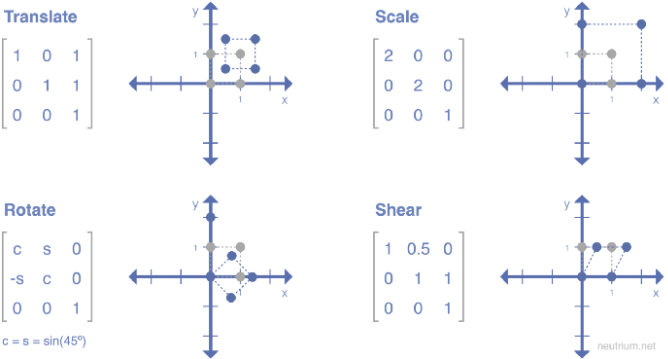
-참고-
https://medium.com/mlait/affine-transformation-image-processing-in-tensorflow-part-1-df96256928a  
    perspective = 원근법

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('nano.jpg')
h, w, c = img.shape
'''
b, g, r = cv2.split(img)  
img = cv2.merge([r,g,b])
'''
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원점을 찍은 좌표이다. 원본 이미지에서의 점들이다.
# 변경 시킬 위치를 지정해준다.
# [0,290] > [10,10] , [380,10] > [760,10], [200,410] > [10,300]
pts1 = np.float32([[0,290],[380,10],[200,410]]) # RGB 변경전
pts2 = np.float32([[10,10],[760,10],[10,300]]) # RGB 변경후


# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (0,290), 10, (255,0,0),-1) #레드포인트
cv2.circle(img, (380,10), 10, (0,255,0),-1) #그린포인트
cv2.circle(img, (200,410), 10, (0,0,255),-1) #블루포인트

# 위치 회전

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (w, h))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

    Perspective(원근) Transformation
    변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환
    변환 행렬 생성 함수
    cv2.getPerspectiveTransform(입력 4개 좌표, 결과 4개 좌표)
    => 변환 행렬 반환 M(3x3)

    원근 변환 함수
    cv2.warpPerspective(img, M, (가로, 세로))

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('perspective.jpg')
h, w, c = img.shape
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
# (빨,녹,파,검) 순으로 좌표 지정.
pts1 = np.float32([[200,600],[100, 800],[560, 600],[650,800]])
# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (200,600), 20, (255,0,0),-1)
cv2.circle(img, (100, 800), 20, (0,255,0),-1)
cv2.circle(img, (560, 600), 20, (0,0,255),-1)
cv2.circle(img, (650,800), 20, (0,0,0),-1)

# 변형 시켜주는 부분
# Perspective = 원근법, 관점
# cv2.getPerspectiveTransform(변경전 위치 값, 변경후 위치 값)
# 원점과 변환좌표를 넣어주면 변환 행렬을 반환해준다.
M = cv2.getPerspectiveTransform(pts1, pts2)
# cv2.warpPerspective(원본이미지, 변경한 이미지, 이미지범위)
# 이미지와 변환 행렬을 연산하면 변환 이미지를 변환
# 커널작업을 해준다.
dst = cv2.warpPerspective(img, M, (1000, 1000))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

In [ ]:
img.shape

# 실습

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('card1.jpg')
h, w, c = img.shape
'''
b, g, r = cv2.split(img)  
img = cv2.merge([r,g,b])
'''
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원점을 찍은 좌표이다. 원본 이미지에서의 점들이다.
# 변경 시킬 위치를 지정해준다.
# [0,290] > [10,10] , [380,10] > [760,10], [200,410] > [10,300]
pts1 = np.float32([[370,80],[700,620],[210,110]]) # RGB 변경전
pts2 = np.float32([[10,10],[800,10],[-10,200]]) # RGB 변경후


# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (355,60), 10, (255,0,0),-1) #레드포인트
cv2.circle(img, (710,630), 10, (0,255,0),-1) #그린포인트
cv2.circle(img, (210,110), 10, (0,0,255),-1) #블루포인트

# 위치 회전
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (850,500))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('card2.jpg')
h, w, c = img.shape
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
# (빨,녹,파,검) 순으로 좌표 지정.
pts1 = np.float32([[210, 220],[120, 450],[760, 220],[840,450]])
# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (210, 220), 20, (255,0,0),-1)
cv2.circle(img, (120, 450), 20, (0,255,0),-1)
cv2.circle(img, (760, 220), 20, (0,0,255),-1)
cv2.circle(img, (840, 450), 20, (0,0,0),-1)

# 변형 시켜주는 부분
# Perspective = 원근법, 관점
# cv2.getPerspectiveTransform(변경전 위치 값, 변경후 위치 값)
# 원점과 변환좌표를 넣어주면 변환 행렬을 반환해준다.
M = cv2.getPerspectiveTransform(pts1, pts2)
# cv2.warpPerspective(원본이미지, 변경한 이미지, 이미지범위)
# 이미지와 변환 행렬을 연산하면 변환 이미지를 변환
# 커널작업을 해준다.
dst = cv2.warpPerspective(img, M, (1000, 1000))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

In [ ]:
from PIL import Image
from pytesseract import *

pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

filename = 'images/1.jpg'
image = Image.open(filename)
text = image_to_string(image , lang='kor')
print(text)

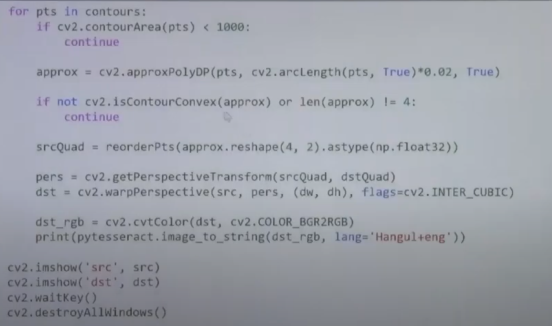

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pytesseract import *

def reorderPts(pts):
    idx = np.lexsort((pts[:,1],pts[:,0]))# 칼럼 0 > 칼럼1 순으로 정렬한 인덱스를 반환
    pts = pts[idx]
    
    if pts[0,1] > pts[1,1]:
        pts[[0,1]]=pts[[1,0]]
    if pts[2,1] < pts[3,1]:
        pts[[2,3]] = pts[[3,2]]
    return pts

img = cv2.imread('images/4.jpg',0) # 폴더명을 영어로해야 인식됨.
# img = cv2.resize(img,(800,800))
h,w = img.shape
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_,mask = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

text = image_to_string(mask , lang='kor+eng')
print(text)

cv2.imshow('img',img)
cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 명함인식 구현하기 (캡처된 이미지)

In [ ]:
# 1 Edge Detection
import numpy as np
import cv2

image = cv2.imread('images/1.jpg')
origin = image.copy()

r = 800.0/ image.shape[0]
dim = (int(image.shape[1] * r), 800)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3,3),0)
edged = cv2.Canny(gray, 75, 200)

print("STEP 1: Edge Detection")

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.namedWindow('Edged', cv2.WINDOW_NORMAL)
cv2.imshow('image',image)
cv2.imshow('Edged',edged)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 2 find Contours of Paper
import numpy as np
import cv2


#image = cv2.imread('images/1.jpg')

(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

for c in cnts:
    perl = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*perl, True)
    
    if len(approx) == 4:
        screenCnt = approx
        break
        
print('STEP 2: Find Contours of Paper')

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.imshow('Outline', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 20210108

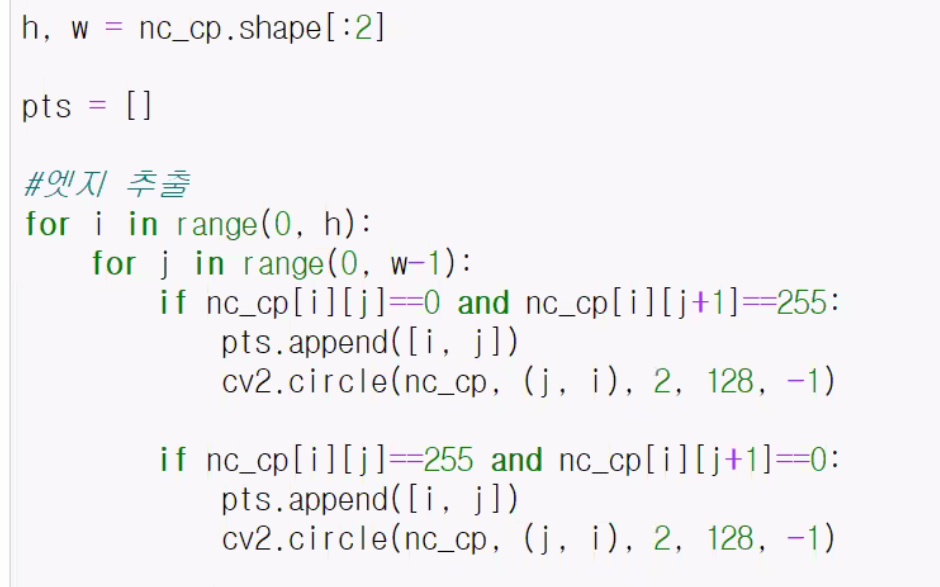

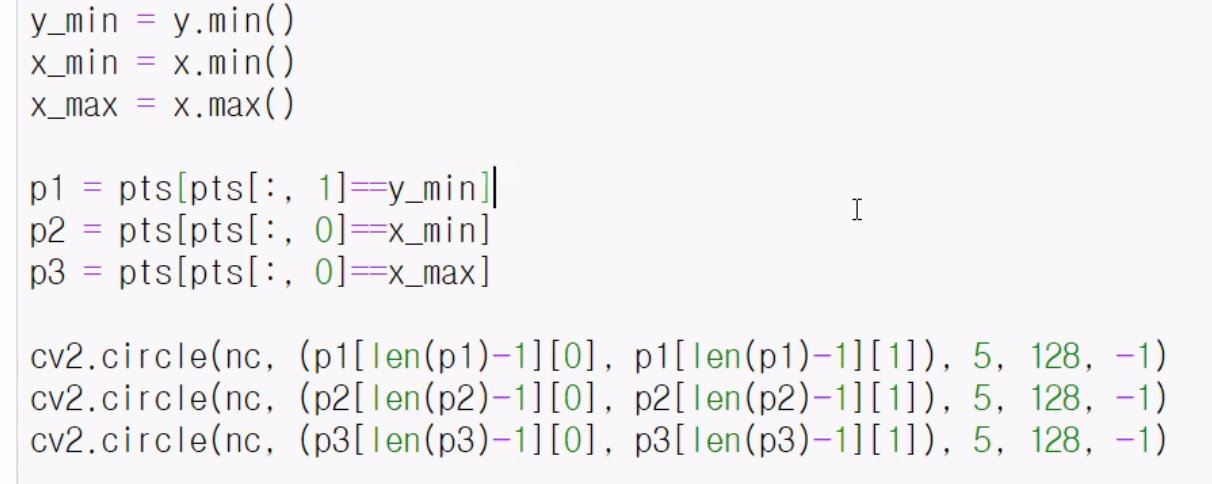

In [ ]:
# 명함 이진화 작업 
import numpy as np
import cv2

image = cv2.imread('namecard1.png',0)
image_copy = image.copy()

# 이진화 작업
image_copy[image_copy[:]<200]=0 # 색이 200이하인 것은 0으로 처리.
image_copy[image_copy[:]!=0]=255 # 0이 아닌 값은 255으로 처리.

h,w = image_copy.shape[:2]
pts = []

# 엣지 추출
for i in range(0,h):
    for j in range(0,w-1):
        if image_copy[i][j] == 0 and image_copy[i][j+1] == 255:
            pts.append([j, i])
            cv2.circle(image_copy, (j, i), 2, 128, -1)
            
        if image_copy[i][j] == 255 and image_copy[i][j+1]==0:
            pts.append([j, i])
            cv2.circle(image_copy, (j, i), 2, 128, -1)
            
pts = np.array(pts)
x = pts[:,0]
y = pts[:,1]

x_min = x.min()
y_min = y.min()
x_max = x.max()
#y_max = y.max()

p1 = pts[pts[:, 1] == y_min]
p2 = pts[pts[:, 0] == x_min]
p3 = pts[pts[:, 0] == x_max]

cv2.circle(image_copy, (p1[len(p1)-1][0],p1[len(p1)-1][1]), 5, 50, -1)
cv2.circle(image_copy, (p2[len(p2)-1][0],p2[len(p2)-1][1]), 5, 50, -1)
cv2.circle(image_copy, (p3[len(p3)-1][0],p3[len(p3)-1][1]), 5, 50, -1)
    
cv2.imshow('image', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
pts

In [ ]:
# 엣지 검출

In [ ]:
# 개인작업 -----------------------------------------------------------
import numpy as np
import cv2

image = cv2.imread('namecard1.png',0)
image_copy = image.copy()

# 이진화 작업
image_copy[image_copy[:]<200]=0 # 색이 200이하인 것은 0으로 처리.
image_copy[image_copy[:]!=0]=255 # 0이 아닌 값은 255으로 처리.

h,w = image_copy.shape[:2]
pts = []

# 엣지 추출
for i in cnts:
    peri = cv2.arcLength(i, True)
    approx = cv2.approxPolyDP(i, 0.02*peri, True)
    
    if len(approx) == 4:
        screenCnt = approx
        size = len(screenCnt)
        break
    
cv2.imshow('image', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

# opencv_8
### 에지 검출
    엣지
    영상에서 픽셀의 밝기 값이 급격하게 변하는 부분
    객체 이미지 테두리
- 에지 검출
    영상을 미분하여 값이 큰 영역을 검출
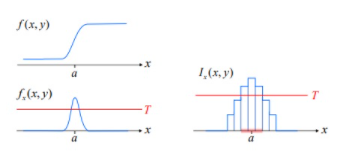

   
    


- 영상에 사용되는 미분 근사화
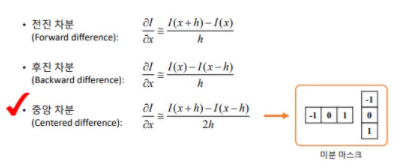
 중앙차분은 현재 픽셀에 앞에것과 뒤에필셀의 차를 계산한다.

- 미분 마스크
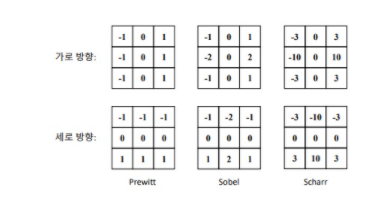

- 소벨필터
    cv2.Sobel(src, ddepth, dx, dy, ksize=None, scale=None, delta=None, borderType=None) => 결과 영상 반환

        ddepth: 결과 영상 데이터 타입, -1이면 입력 영상과 동일.
        dx: x방향 미분 차수
        dy: y방향 미분 차수
        ksize: 커널 크기. 보통 3
        scale: 결과 영상에 추가로 곱할 값. 기본은 1.
        delta: 결과 영상에 추가로 더할 값. 기본은 0.

In [ ]:
import numpy as np
import cv2

src = cv2.imread('c.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(src, -1, 1, 0, delta=128) # x축 미분.
dy = cv2.Sobel(src, -1, 0, 1, delta=128) # y축 미분.

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey(0)

cv2.destroyAllWindows()

<샤르 필터>
        cv2.Scharr(src, ddepth, dx, dy, scale=None, delta=None, borderType=None) => 결과 영상 반환

    ddepth: 결과 영상 데이터 타입, -1이면 입력 영상과 동일.
    dx: x방향 미분 차수
    dy: y방향 미분 차수
    scale: 결과 영상에 추가로 곱할 값. 기본은 1.
    delta: 결과 영상에 추가로 더할 값. 기본은 0.

In [ ]:
import numpy as np
import cv2

src = cv2.imread('c.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Scharr(src, -1, 1, 0, delta=128)
dy = cv2.Scharr(src, -1, 0, 1, delta=128)

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey(0)

cv2.destroyAllWindows()

- 그래디언트(gradient)
        영상을 편미분하여 구한 벡터
        그래디언트 크기: 픽셀 값 차이 크기
        그래디언트 방향: 픽셀 값이 가장 급격하게 증가하는 방향
        
    -크기 계산 함수
        cv2.magnitude(x, y) => 2D 벡터 크기 행렬 반환
        x: x축 미분값(실수형)
        y: y축 미분값(실수형)
    
    -방향 계산 함수
        cv2.phase(x, y, angleInDegree=None) => angle
        x: x축 미분값(실수형)
        y: y축 미분값(실수형)
        angleInDegree: True이면 각도, False이면 래디언

In [ ]:
import numpy as np
import cv2

src = cv2.imread('c.jpg', cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0) # 1.소벨필터를 이용해서 미분. 
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)

dst = np.zeros(src.shape[:2], np.uint8)
dst[mag > 120] = 255 # 강도가 강한 부분에만 하향게 그려줌
#_, dst = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

    <케니 에지 검출>
    에지를 잘 검출하려면?
    정확한 검출: 점이나 노이즈를 에지로 찾거나 에지를 놓치는 확률 최소화
    정확한 위치: 에지 중심 검출
    단일 에지: 하나의 에지는 하나의 점으로 표현

- 케니 에지 검출 단계
        1. 가우시안 필터링: 잡음 제거
        2. 그래디언트 계산: 소벨 마스크를 이용해서 크기, 방향 계산
        3. 비최대 억제: 하나의 에지가 여러 개 픽셀로 표현되는 것을 막기 위해 그래디언트 크기가 국지적 최대인 픽셀만 선택
        4. 히스테리시스 에지 트래킹: 걸러진 에지 중에서 약한 에지는 버리고 강한 에지와 연결된 에지만 최종 선택
    
    케니 함수
    cv2.Canny(img, threshold1, threshold2, apertureSiz=None, L2gradient=None) => 에지 영상 반환
    threshold1 – Hysteresis Thredsholding 작업에서의 min 값
    threshold2 – Hysteresis Thredsholding 작업에서의 max 값 apertureSiz - 소벨 연산에 사용할 커널 크기
    L2gradient - 그래디언트 계산 수식 지정. True, False(기본값)

    이진화 임계값 함수
    cv2.threashold(src, thresh, maxval, type) => (임계값, 이진화 영상)
    thresh: 이진화 임계값
    maxval: 임계값을 넘었을 때 적용할 value
    type: 이진화 종류 지정
- thresholding type
        cv2.THRESH_BINARY
        cv2.THRESH_BINARY_INV 
        cv2.THRESH_TRUNC
        cv2.THRESH_TOZERO
        cv2.THRESH_TOZERO_INV

In [ ]:
import numpy as np
import cv2


src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.Canny(src, 50, 150)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

카메라 입력 받아 동영상을 애니메이션 효과주기   
기본 영상에 불러 효과를 많이 주어 전체 화면을   
수채화처럼 뭉개주고 엣지 검출한 것을 합성하여   
테두리는 하얀 경계를 그려준 효과로 영상이 나오게 하시오  

In [ ]:
# 영상 읽어오기
import cv2

cap = cv2.VideoCapture('video.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    blr = cv2.GaussianBlur(gray, (0, 0), 3) # 밝은 곳은 더 밝게 어두운 곳은 더 어둡게 해야 스케치스러운 느낌을 받을 수 있다
    dst = cv2.divide(gray, blr, scale=255) # 흑백영상을 블러로 나눈 값을 255로 곱함.
    dst_canny = cv2.Canny(dst, 10, 255)
    cv2.imshow('frame',dst)

    if cv2.waitKey(26) & 0xFF == ord('q'):
        break       

cap.release()
cv2.destroyAllWindows()

In [ ]:
# 은표님 작업 
import cv2
cat = cv2.VideoCapture(0)

while cat.isOpened():
    ret, frame = cat.read()
    if ret:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray,(3,3),0)       
        gray = cv2.Canny(gray,50,100)
        gray_rev = cv2.bitwise_not(gray)
        new = cv2.bitwise_and(frame,frame, mask=gray_rev)
        cv2.imshow('video',new)
        
        if cv2.waitKey(1) == 27:
            break
      
cat.release()        
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
# 은표님 작업
cat = cv2.VideoCapture(0)

while cat.isOpened():
    ret, frame = cat.read()
    if ret:
       
        blur = cv2.GaussianBlur(frame,(3,3),0) 
        gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
        gray = cv2.Canny(blur,50,51)
#         gray_rev = cv2.bitwise_not(gray)
        dst = cv2.bitwise_or(gray,gray, mask=gray)

        cv2.imshow('video',dst)
        
        if cv2.waitKey(1) == 27:
            break
      
cat.release()        
cv2.waitKey()
cv2.destroyAllWindows()


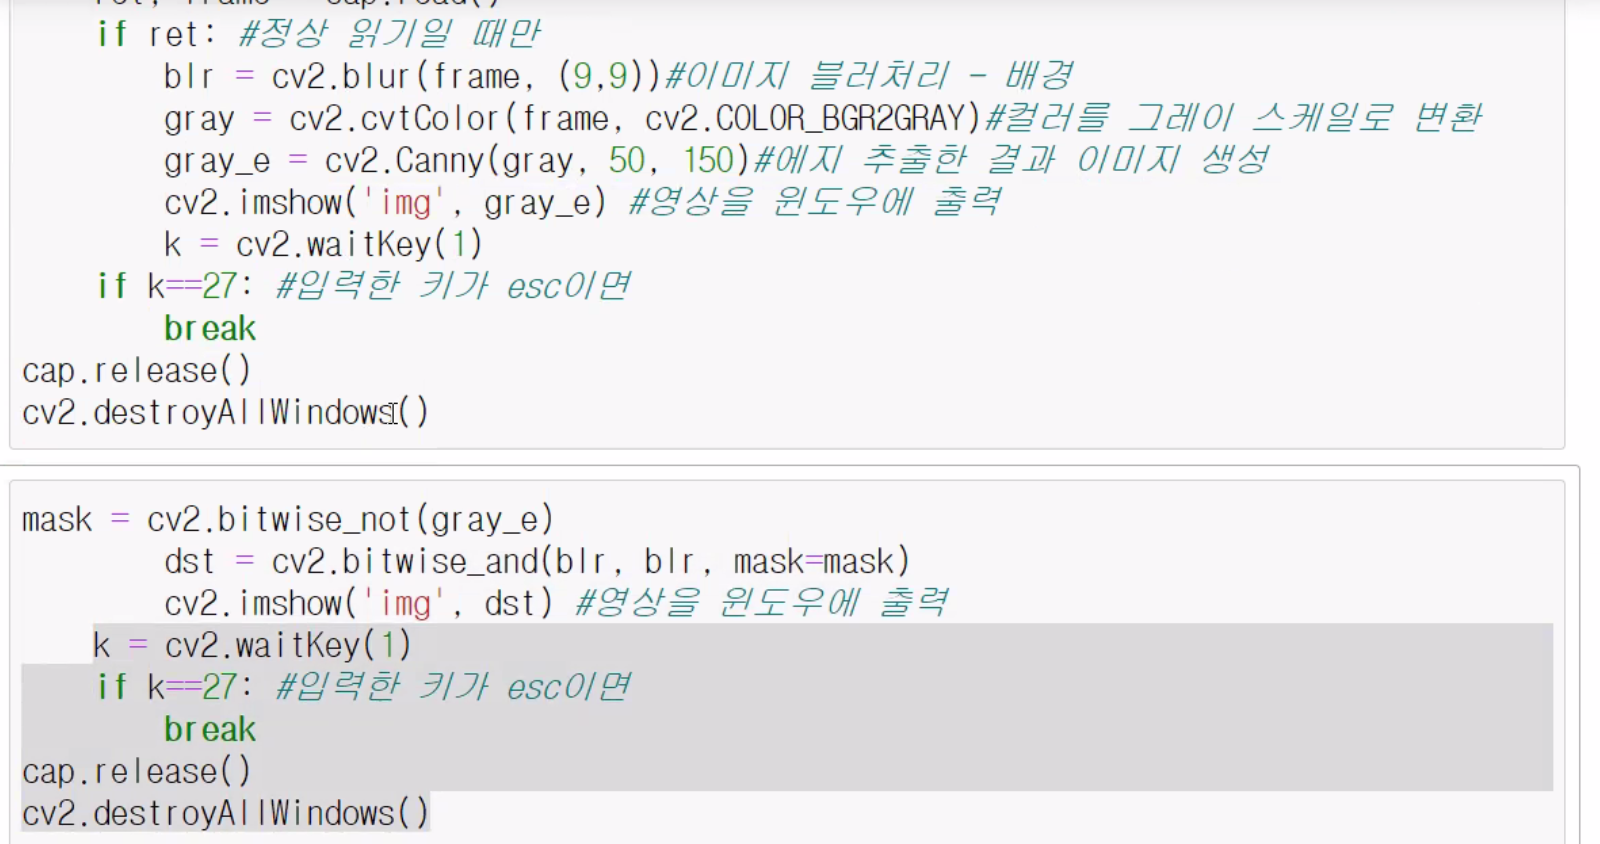

In [ ]:
# 강사님 구현
import cv2
cap = cv2.VideoCapture(0)#카메라 오픈

cap.set(3, 300) 
cap.set(4, 200)
while True:
    ret, frame = cap.read() 
    if ret: #정상 읽기일 때만        
        blr = cv2.blur(frame, (9,9))#이미지 블러처리 - 배경
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)#컬러를 그레이 스케일로 변환
        gray_e = cv2.Canny(gray, 50, 150)#에지 추출한 결과 이미지 생성
        mask = cv2.bitwise_not(gray_e)
        dst = cv2.bitwise_and(blr, blr, mask=mask)
        cv2.imshow('img', dst) #영상을 윈도우에 출력
        k = cv2.waitKey(1)
    if k==27: #입력한 키가 esc이면
        break
cap.release()
cv2.destroyAllWindows()

<허프 변환 직선 검출>  
직선의 방정식은  
y = ax + b  
이지만 y축과 평행한 수직선은 표현 못함. 그래서 이를 보완해 극좌표계 직선의 방정식 사용

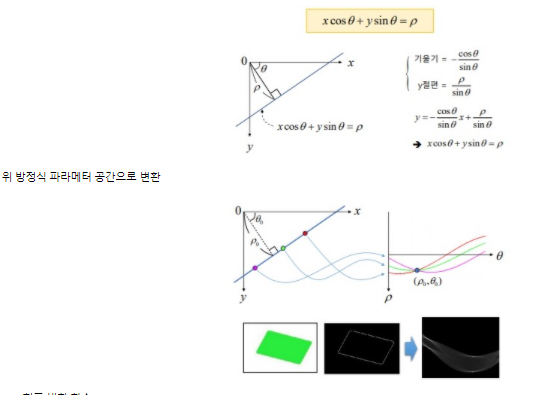

    허프 변환 함수
    cv2.HoughLines(img, rho, theta, threshold, srn=None, stn=None, min_theta=None, max_theta=None) => 직선 파라메터를 담은 행렬
    rho – r 값의 범위 (0 ~ 1 실수)
    theta – 𝜃 값의 범위(0 ~ 180 정수)
    threshold – 직선으로 판단할 임계값, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.
    srn, stn - 멀티 스케일 허프 변환에서 rho, theta를 나누는 값. 기본은 0
    min_theta, max_theta - theta 최소, 최대값
    cv2.HoughLines()함수의 단점
    반환된 모든 점에 기울기를 계산하여 시작점과 끝점을 계산해야 함. 그리고 모든 점에 대해서 연산하므로 속도가 느림. 이를 보완한 함수가 확율 허프 변환 함수다.
    확율 허프 변환
    이전 허프변환을 최적화 한 것.
    모든 점을 대상으로 하는 것이 아니라 임의의 점을 이용하여 직선을 찾는 것입니다. 단 임계값을 작게 해야함.
    장점은 선의 시작점과 끝점을 Return해주기 때문에 쉽게 화면에 표현할 수 있다.
    cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap) => lines
    rho – r 값의 범위 (0 ~ 1 실수)
    theta – 𝜃 값의 범위(0 ~ 180 정수)
    threshold – 직선으로 판단할 임계값
    minLineLength - 검출할 선의 최소 길이
    maxLineGap - 직선으로 간주할 최대 에지 점 간격

In [ ]:
import numpy as np
import cv2


src = cv2.imread('111.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180., 50,
                        minLineLength=100, maxLineGap=5)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])  # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3])  # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

허프 변환 원검출 함수
cv2.HoughCircles(img, method, dp, minDist, param1=None, param2=None, minRadius=None, maxRadius=None) => 검출원 행렬 반환

method: cv2.HOUGH_GRADIENT 만 가능
dp: img와 축적배열 크기 비율. 1은 같음, 2는 축적배열이 img의 반
minDist: 검출된 원 중심점들의 최소 거리
param1: 케니 검출기의 높은 임계값
param2: 축적 배열의 원 검출을 위한 임계값
minRadius, maxRadius: 검출할 원의 최소, 최대 반지름

In [ ]:
import cv2

src = cv2.imread('dial.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)

dst = src.copy()

if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)
    
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

1. 명함 추출 안드로이드 어플 만들기.

2. 코인 사진에서 허프변환을 사용해서 동전을 추출하고 금액*100을 계산해서 110390174598 신한 계좌로 입금하기

3. 첫 시간에 했던 명함 엣지 추출(루프) 코드에서 루프를 numpy 함수로 대체해서 해당 명함번호로 문자메세지 전송하기.

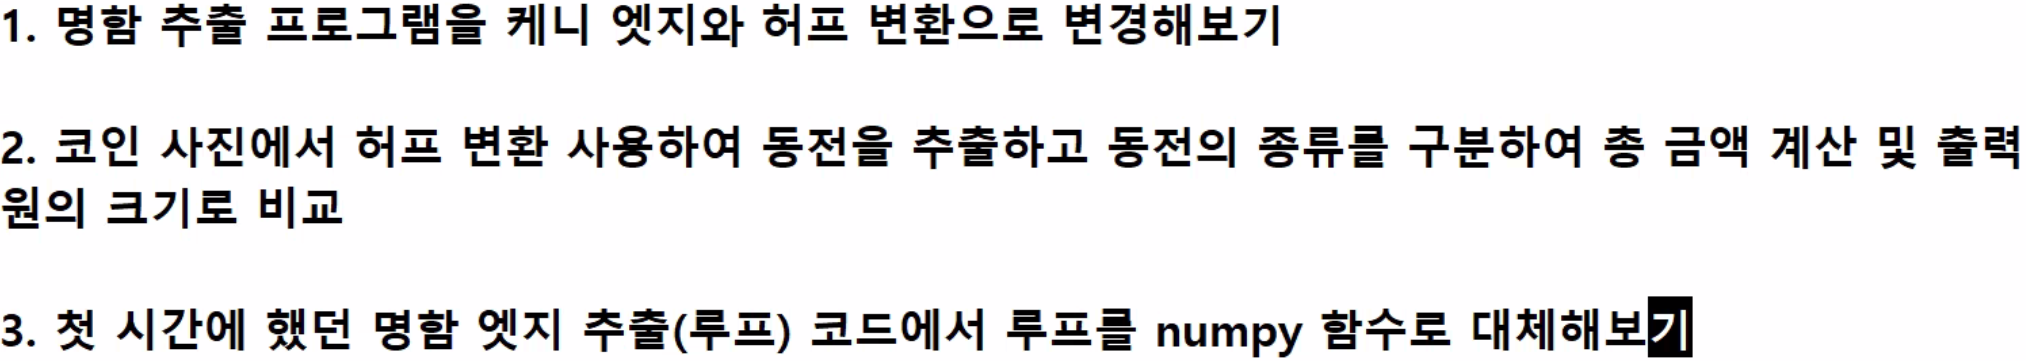

In [ ]:
import cv2

src = cv2.imread('coins1.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)
dst = src.copy()
small, big = 0, 0
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        #cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)
        if radius < 40:
            small += 1
            cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)
        else:
            big += 1
            cv2.circle(dst, (cx, cy), int(radius), (0, 255, 0), 2, cv2.LINE_AA)

print(f'가격은 : {small*10+big*100} 원')
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
np.squeeze(circles,0)

In [ ]:
import numpy as np
import cv2

src = cv2.imread('coins1.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray,(0,0),1.0)

circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                          param1=100, param2=40, minRadius=20, maxRadius=80)

dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        if radius > 40:
            cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)
        else:
            cv2.circle(dst, (cx, cy), int(radius), (0, 255, 255), 2, cv2.LINE_AA)
circles = np.squeeze(circles,0)           
size = circles[:,2]
            
size[size > 40] = 100 
size[size != 100] = 10 

print (f'가격은 : {size.sum()}원')   

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


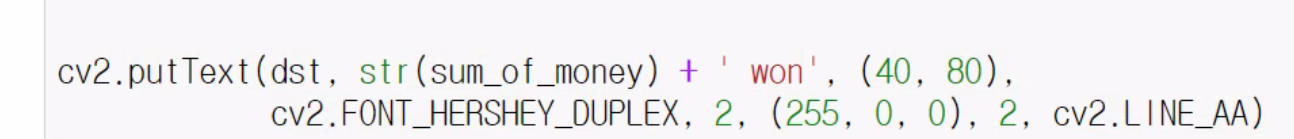

In [ ]:
import cv2

src = cv2.imread('coins1.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

# 허프 변환 원 검출
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)
# 원 검출 결과 및 동전 금액 출력
r = circles[0,:,2] # radius만 추출 해서 r에 저장
r_mean = np.mean(r) #radius 평균 값 계산
sum_of_moeny = 0 # 토탈 금액 변수
dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]
        cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)
        
        won = 10
        if radius > r_mean:
            won = 100
        
        cv2.putText(dst, str(won), (int(cx)-15), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0), 2, cv2.LINE_AA)
        
        sum+=won
        
cv2.putText(dst, str(sum) + 'won',(40,80), cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0), 2, cv2.LINE_AA)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

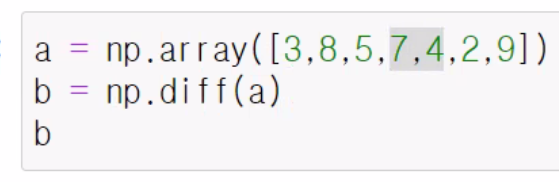

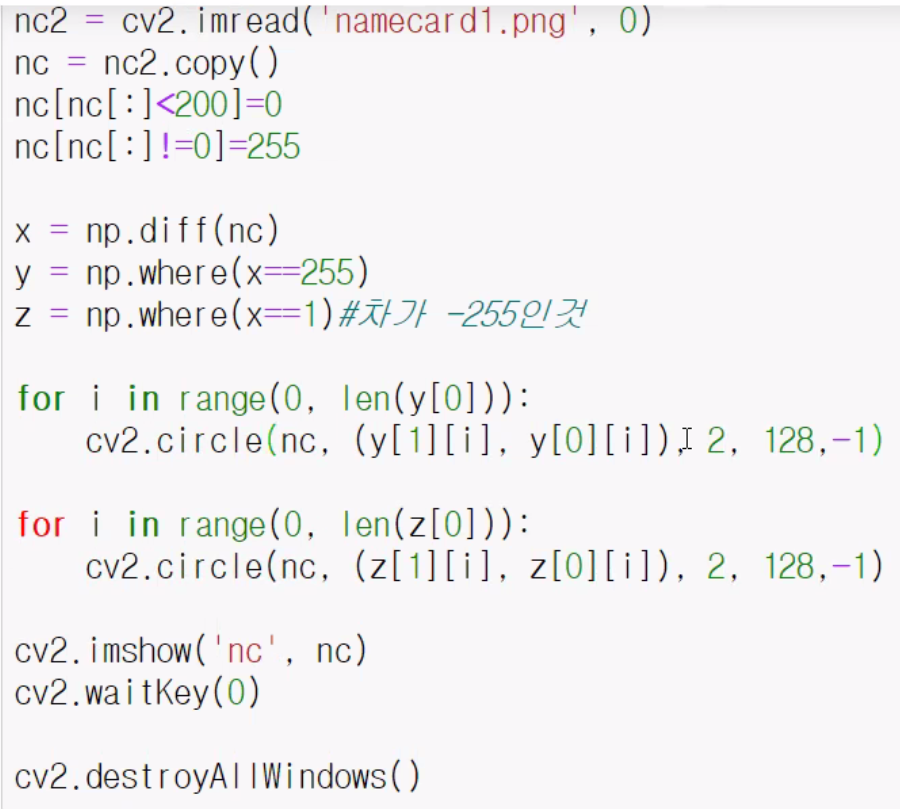